#### new pipeline, convert meta file interactively, examine sampling schedule and debug

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
wd = "/grid/siepel/home_norepl/mo/dom_adapt/bkgd_sims"

In [3]:
meta_data = np.genfromtxt(f'{wd}/reg_hdswp_0923.meta', usecols=(1, 2, 3, 4), dtype=None)

/sonas-hs/it/hpc/home/easybuild/install_prod/software/Core/Anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [4]:
meta_data.shape

(250000,)

In [5]:
no_sims = meta_data.shape[0]
meta_df = np.empty((no_sims, 4))

cnt = 0
for r_idx in range(no_sims):
    try:
        ID = int(meta_data[r_idx][3].split(b'_')[-2]) # retrieve 1-based index from meta file
        #sim_path = meta_data[r_idx][3].decode()[:-4]+"samp.trees"
        #if not os.path.isfile(sim_path): continue
        
        meta_df[r_idx] = np.array([ID, meta_data[r_idx][0], meta_data[r_idx][1], meta_data[r_idx][2]])
        #idx_ls.append(ID)
        #sc_ls.append(meta_data[r_idx][0])
        #onset_ls.append(meta_data[r_idx][1])
        #caf_ls.append(meta_data[r_idx][2])
        cnt += 1
    except:
        print(r_idx)

In [6]:
meta_df.shape

(250000, 4)

In [8]:
test_idx = 123456
print(meta_data[test_idx], meta_df[test_idx], sep="\n")

(0.00749236, 808, 0.25405, b'reg_hdswp_0923/reg_hdswp_0923_159957_temp')
[1.59957e+05 7.49236e-03 8.08000e+02 2.54050e-01]


In [9]:
meta_sorted = meta_df[np.argsort(meta_df[:, 0])]

In [10]:
meta_sorted.shape

(250000, 4)

In [12]:
meta_sorted[159956]

array([1.59957e+05, 7.49236e-03, 8.08000e+02, 2.54050e-01])

In [13]:
np.save(f"{wd}/reg_hdswp_0923_meta.npy", meta_sorted)

In [14]:
gen = meta_sorted[:, 2]
sc = meta_sorted[:, 1]
AF = meta_sorted[:, 3]

TypeError: You must first set_array for mappable

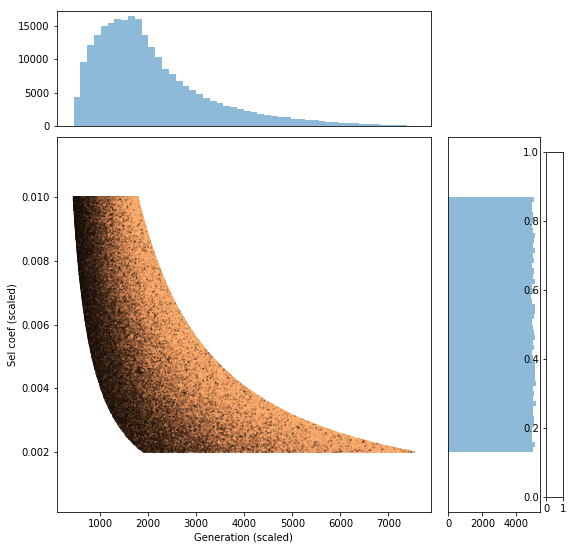

In [15]:
### Plot gen v sel coef ###
# set colormap
af_cmap = cm.get_cmap(name="copper")

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(gen, sc, c=AF, s=1, cmap=af_cmap, vmin=0, vmax=1, alpha=0.5) # change vmin, vmax!!
#early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
#axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
#late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
#axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

#axScatter.set_xlim((2200, 2500))
#axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Generation (scaled)")
axScatter.set_ylabel("Sel coef (scaled)")
#axScatter.set_yscale("log")

bins = 50
# axHistx.hist([x[~cat], x[cat]], alpha=0.5, bins=bins, color=[neg_color, pos_color], stacked=True)
axHistx.hist(gen, alpha=0.5, bins=bins)


# axHisty.hist([y[~cat], y[cat]], alpha=0.5, bins=bins, orientation='horizontal', color=[neg_color, pos_color], stacked=True)
axHisty.hist(sc, alpha=0.5, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(cm.ScalarMappable(cmap=af_cmap))
#plt.savefig(file_path+"_distr.pdf")
plt.show()

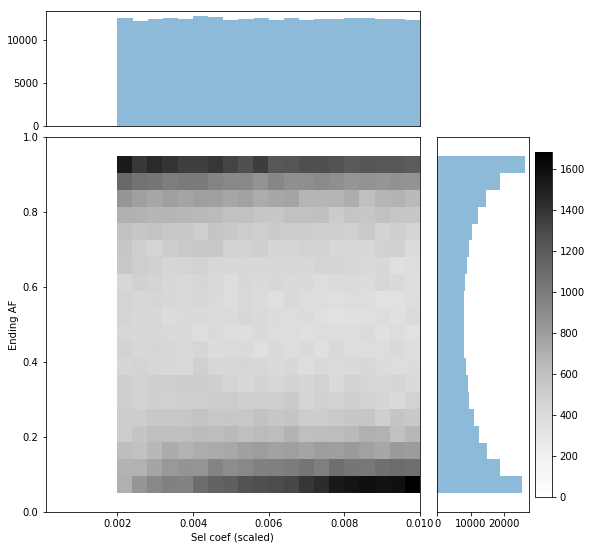

In [16]:
## Plot sel coef v. AF ##

no_bin = 20
hist_cmap = cm.get_cmap(name="Greys")
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# 2D histogram:
_, _, _, im = axScatter.hist2d(sc, AF, bins=no_bin, cmap=hist_cmap, vmin=0)

axScatter.set_xlim((1e-4, 1e-2))
axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Sel coef (scaled)")
axScatter.set_ylabel("Ending AF")

axHistx.hist(sc, alpha=0.5, bins=no_bin)
axHisty.hist(AF, alpha=0.5, bins=no_bin, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(im)
#plt.savefig(file_path+"_distr.pdf")
plt.show()